In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
import os
import sys
import warnings
# from ydata_profiling import ProfileReport


warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../data/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df.describe(include='O')



,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [5]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df.dropna(inplace=True)


In [7]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [9]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Tutoring_Sessions','Sleep_Hours','Physical_Activity'])

In [11]:
# find Outliers using boxplot
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    # sns.boxplot(x=df[col])
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.show()
    fig=px.box(df, x=col, title=f'Boxplot of {col}')
    fig.show()

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [12]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [13]:
def treat_outliers_iqr(data, column, lower_quantile=0.01, upper_quantile=0.98, factor=1.5, cap=True):
    # Q1 = data[column].quantile(0.01)
    # Q3 = data[column].quantile(0.99)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    # data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    # # data[column].drop()
    # return data
    Q1 = data[column].quantile(lower_quantile)
    Q3 = data[column].quantile(upper_quantile)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    if cap:
        # Cap extreme values
        data[column] = np.clip(data[column], lower_bound, upper_bound)
    else:
        # Remove rows containing outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data
# for col in numerical_cols:
df = treat_outliers_iqr(df, 'Exam_Score')

In [14]:
plt.figure(figsize=(10, 4))
    # sns.boxplot(x=df[col])
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.show()
fig=px.box(df, x='Exam_Score', title=f'Boxplot of Exam_Score')
fig.show()

<Figure size 1000x400 with 0 Axes>

In [15]:
# find Outliers using boxplot
for col in numerical_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.union(['Tutoring_Sessions','Sleep_Hours','Physical_Activity'])
# categorical_cols

In [17]:
for col in categorical_cols:
    # Pie plot to see the column distribution of column 'diagnosis'
    fig=px.pie(df, names=col, title='Distribution of {col}')
    fig.show()

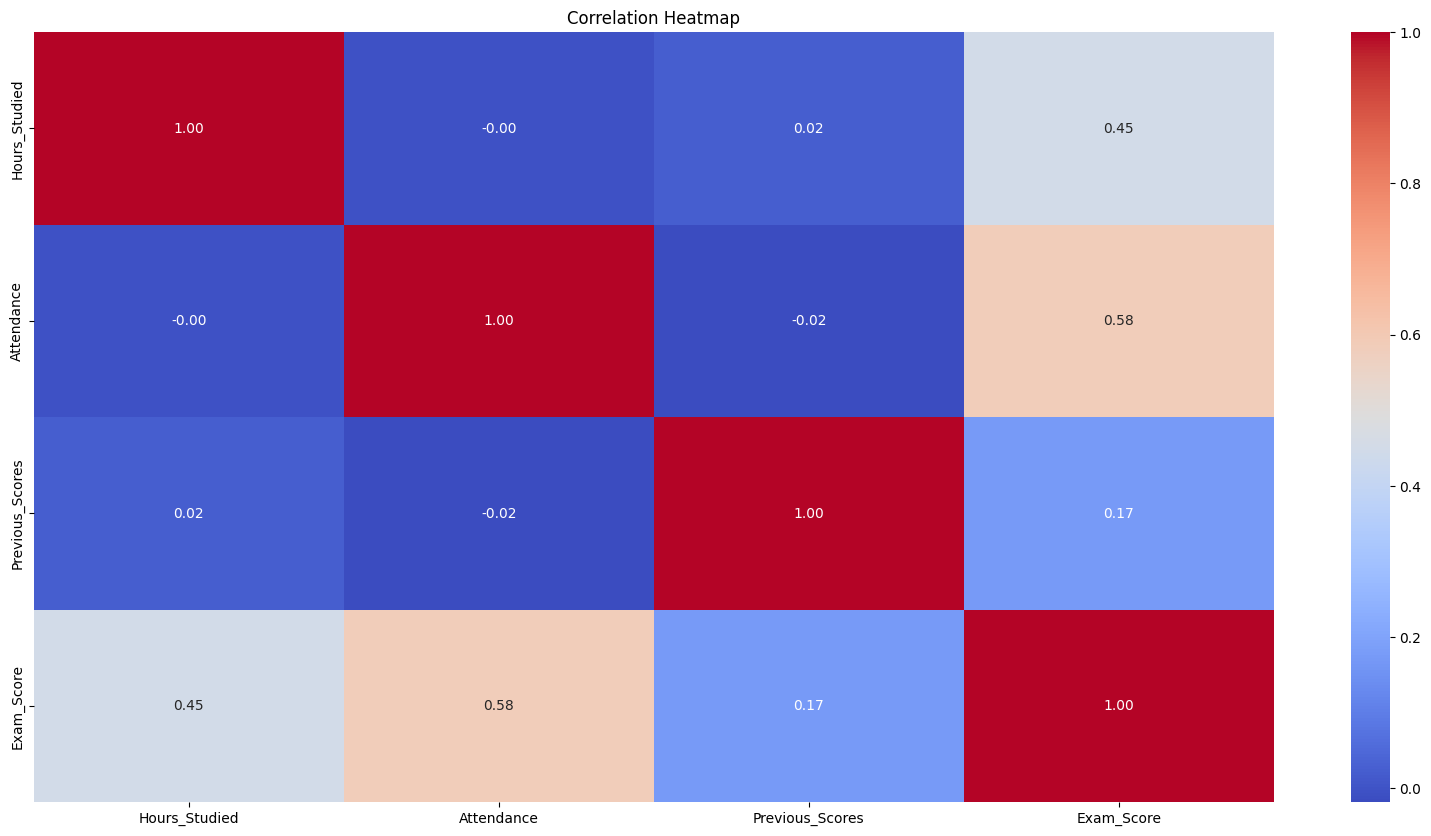

In [18]:
plt.figure(figsize=(20, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

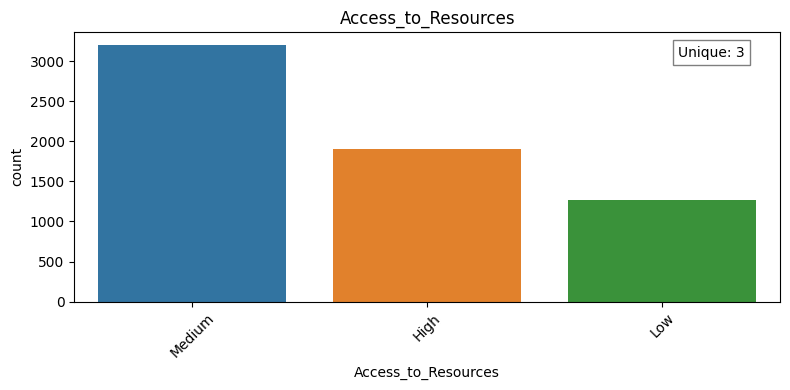

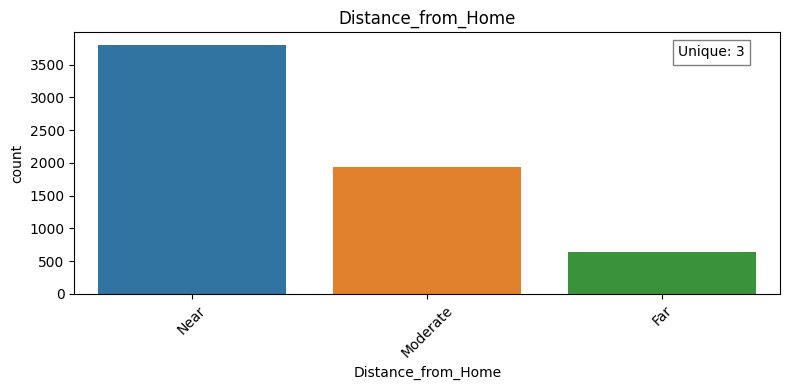

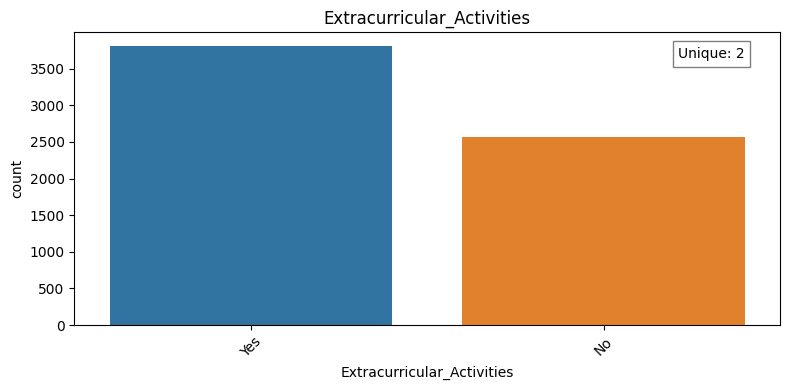

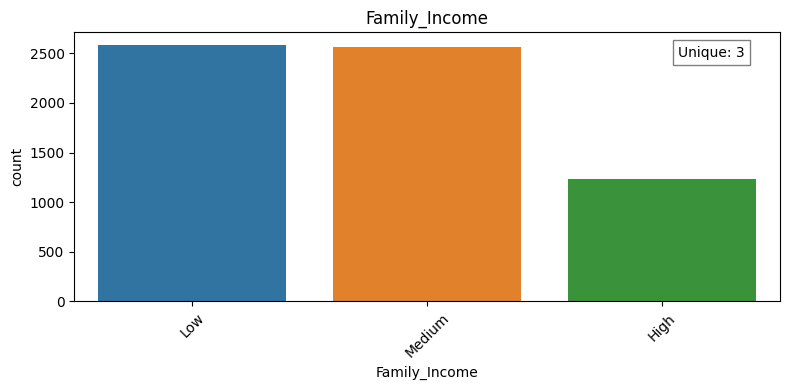

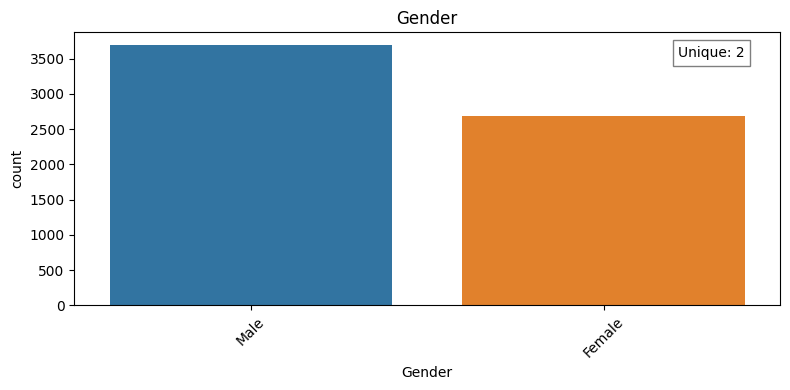

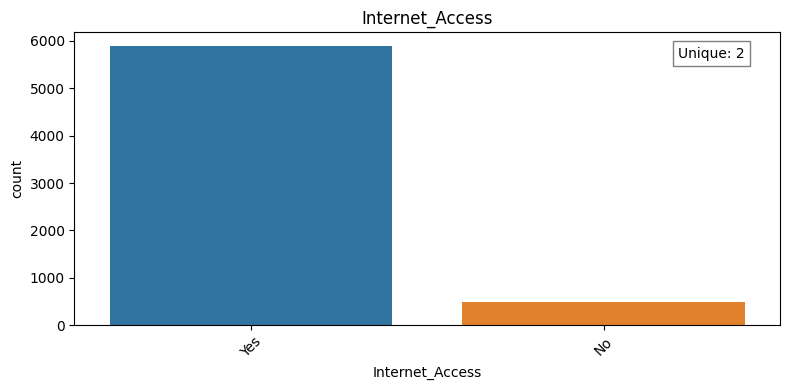

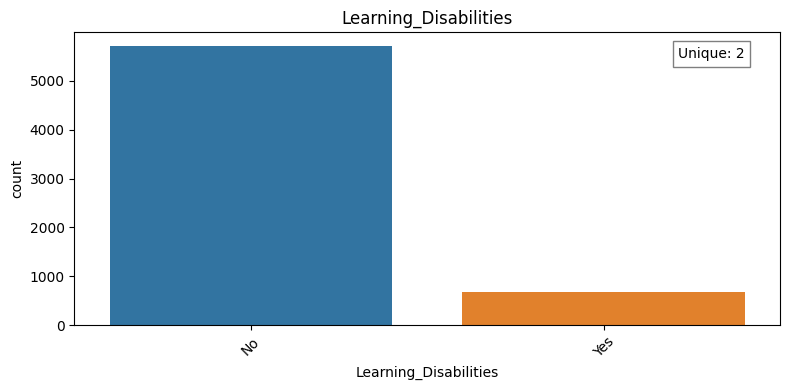

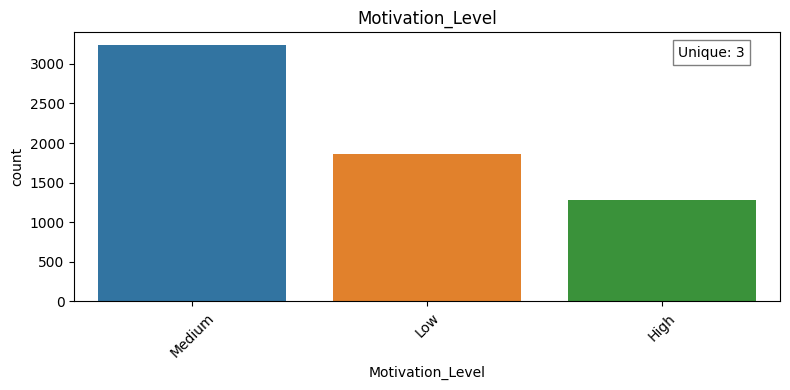

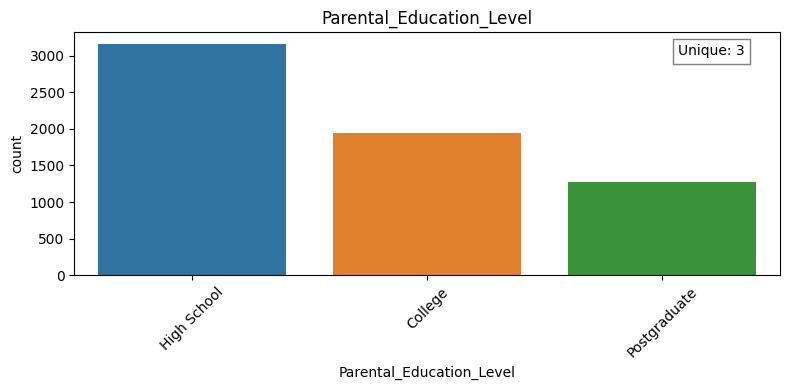

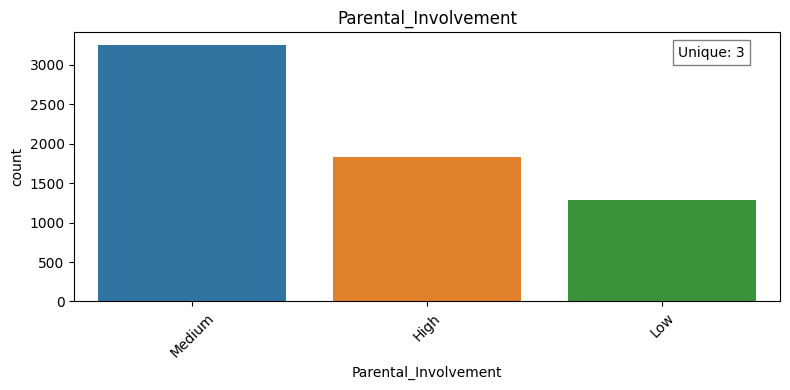

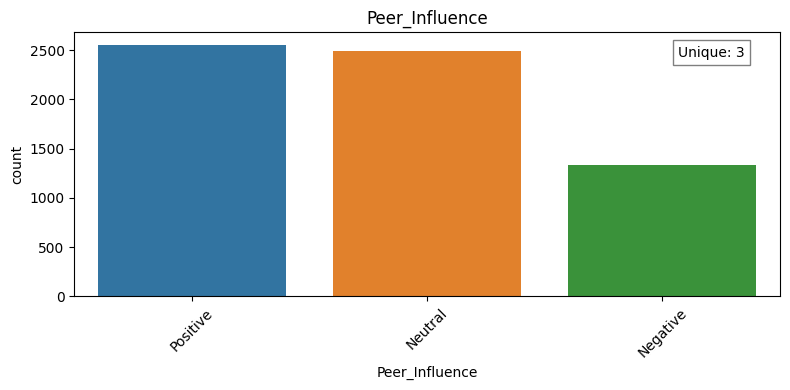

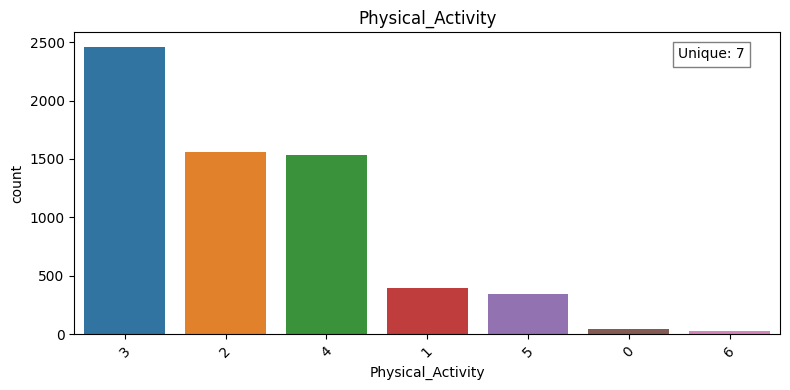

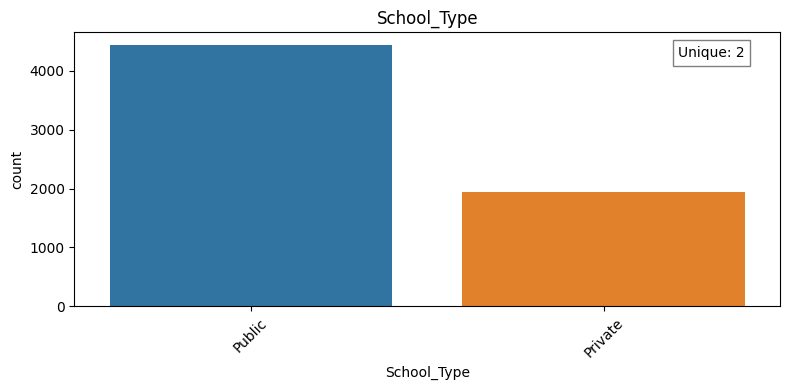

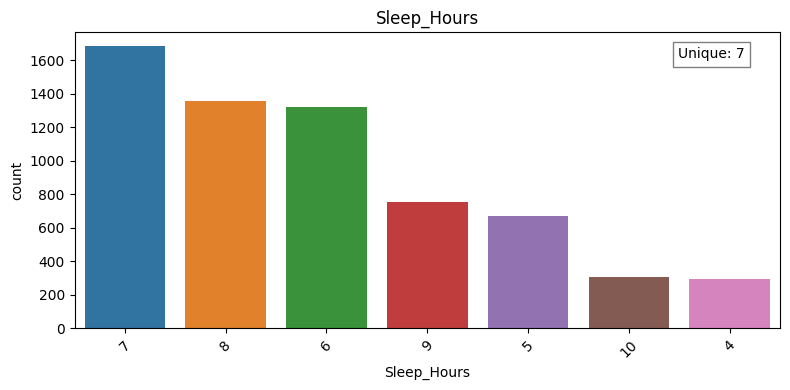

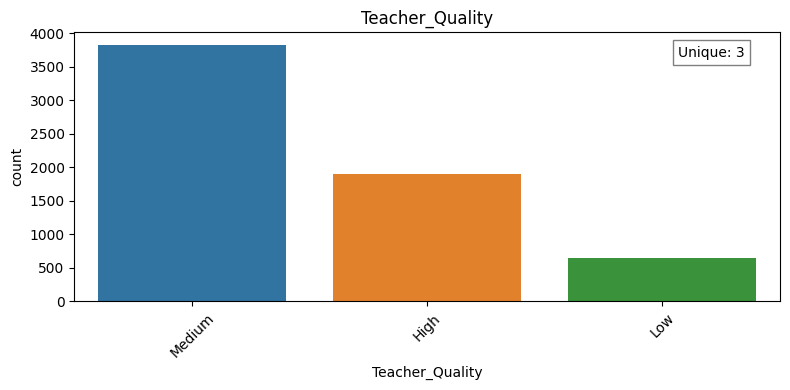

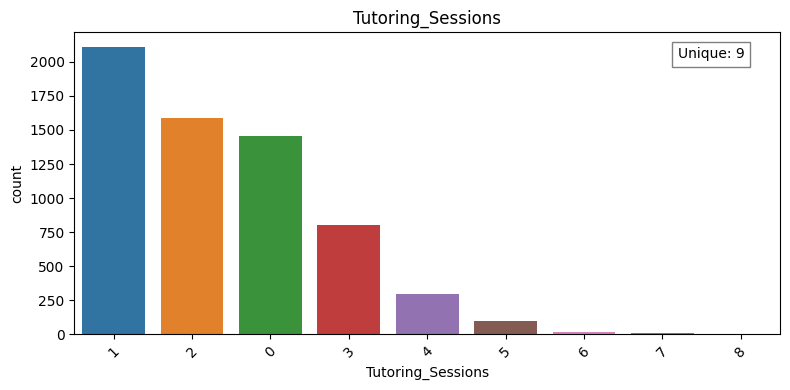

In [19]:
def univariable_categorical(df):
    # cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # Plot Bar plots for categorical features (top 10 categories)
    for col in categorical_cols:
        # Get top 10 categories
        top_10 = df[col].value_counts().nlargest(10)
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=top_10.index)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
        # Annotate No. of unique values with box
        n_unique = df[col].nunique()
        plt.text(0.95, 0.95, f'Unique: {n_unique}', horizontalalignment='right', verticalalignment='top', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
        plt.tight_layout()
        plt.show()

univariable_categorical(df)

<Axes: >

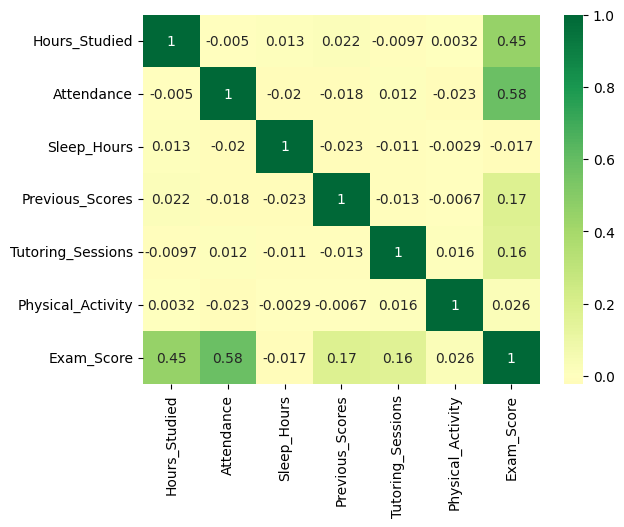

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

In [21]:
df.to_csv('../data/semi_cleaned_StudentPerformanceFactors.csv', index=False)